In [38]:
# Import packages

# For data manipulation

import numpy as np
import pandas as pd

# For data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes

pd.set_option('display.max_columns', None)

# For data modeling

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn. linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn. tree import plot_tree

# For saving models

import pickle

In [39]:
import xgboost
print(xgboost.__version__)

3.1.1


In [40]:
# Load d a t a s e t into a dataframe
### YOUR CODE HERE ###|
df0 = pd.read_csv("HR_Sailfort_dataset.csv")
# Display fi r s t few rows of the dataframe
### YOUR CODE HERE ###|
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [41]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [42]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [43]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [44]:
df0 = df0.rename(columns={'Work_accident' : 'work_accident',
                          'Department' : 'department',
                          'average_montly_hours' : 'average_monthly_hours',
                          'time_spend_company' : 'tenure'})
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [45]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [46]:
df0.duplicated().sum()

np.int64(3008)

In [47]:
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [48]:
df1 = df0.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


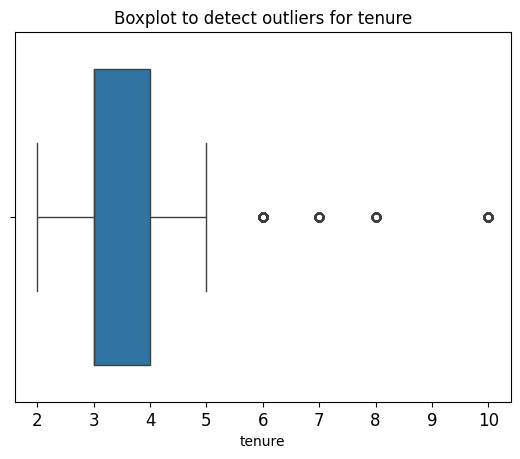

In [49]:
#Create a box plot to visualize distribution of 'tenure' and detect any outliers
plt. title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [50]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# compute the 25th of 'tenure'
percentile25 = df1['tenure'].quantile(0.25)
# compute the 75th of 'tenure'
percentile75 = df1['tenure'].quantile(0.75)
# compute the interquartile range (IQR) of 'tenure'
iqr = percentile75 - percentile25
# compute the lower bound for detecting outliers
lower_bound = percentile25 - 1.5 * iqr
# compute the upper bound for detecting outliers
upper_bound = percentile75 + 1.5 * iqr
# filter the dataframe to get the rows with outliers in 'tenure'
outliers = df1[(df1['tenure'] < lower_bound) | (df1['tenure'] > upper_bound)]

# print lower and upper bounds
print("Lower bound for detecting outliers:", lower_bound)
print("Upper bound for detecting outliers:", upper_bound)

# get the number of rows with outliers
num_outliers = outliers.shape[0]
print("Number of rows with outliers in 'tenure':", num_outliers)


Lower bound for detecting outliers: 1.5
Upper bound for detecting outliers: 5.5
Number of rows with outliers in 'tenure': 824


In [51]:
# Get numbers o f people who left v s . stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts)
print()
# Get percentages o f people who left vs. stayed
### YOUR CODE HERE ###|
print(df1['left'].value_counts(normalize=True))

<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64>

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


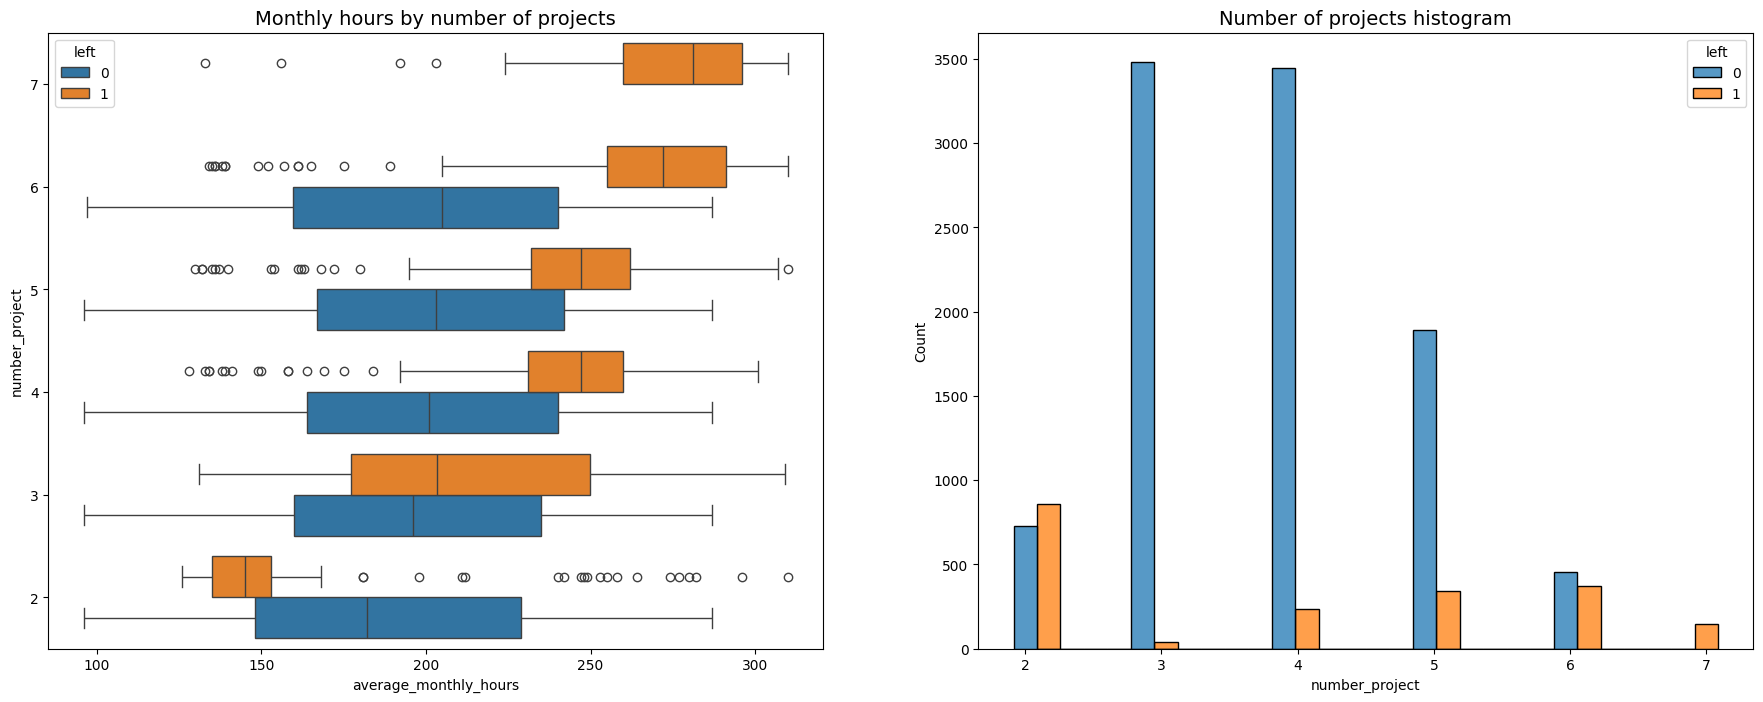

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(22, 8))
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')
plt.show()


In [54]:
df1[df1 ['number_project'] == 7] ['left']. value_counts()

left
1    145
Name: count, dtype: int64

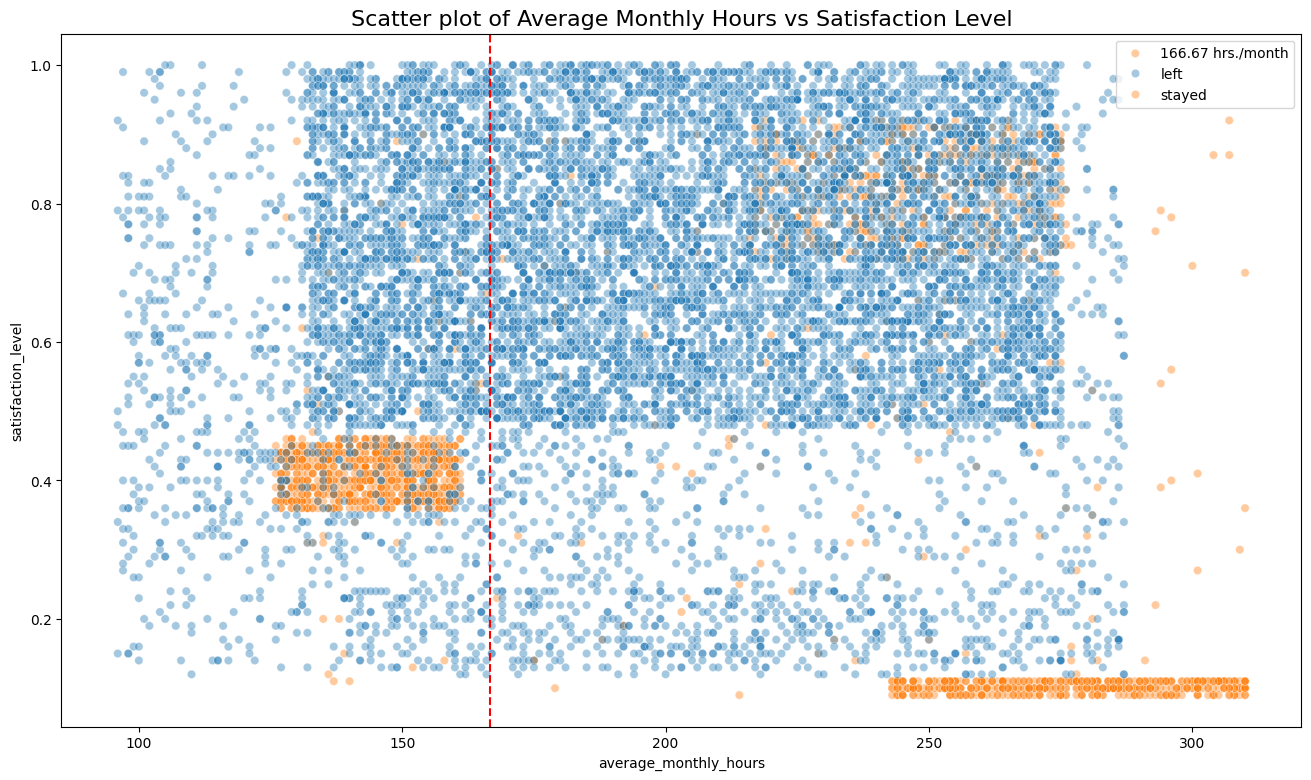

In [65]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='red', linestyle='--', label='166.67 hrs./month')
plt.legend(labels = ['166.67 hrs./month', 'left', 'stayed'])
plt.title('Scatter plot of Average Monthly Hours vs Satisfaction Level', fontsize=16);


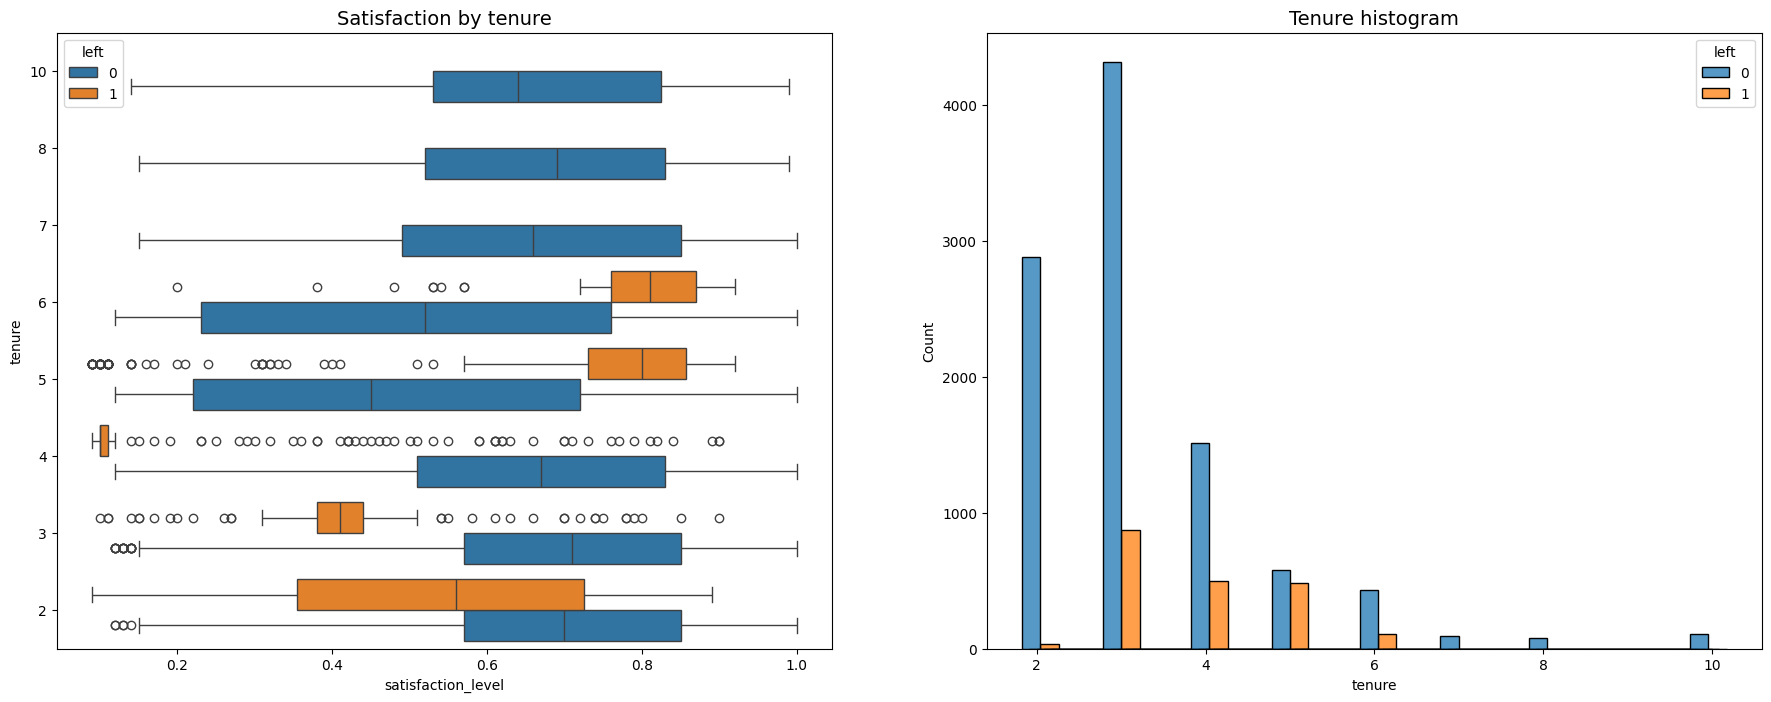

In [84]:
fig, ax = plt.subplots(1,2,figsize=(22, 8))
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')
# Create histogram showing distribution o f 'tenure', comparing employees who stayed versus those who left
tenure_stay = df1[df1['left'] == 0 ] ['tenure']
tenure_left = df1[df1['left'] == 1 ] ['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')
plt.show()

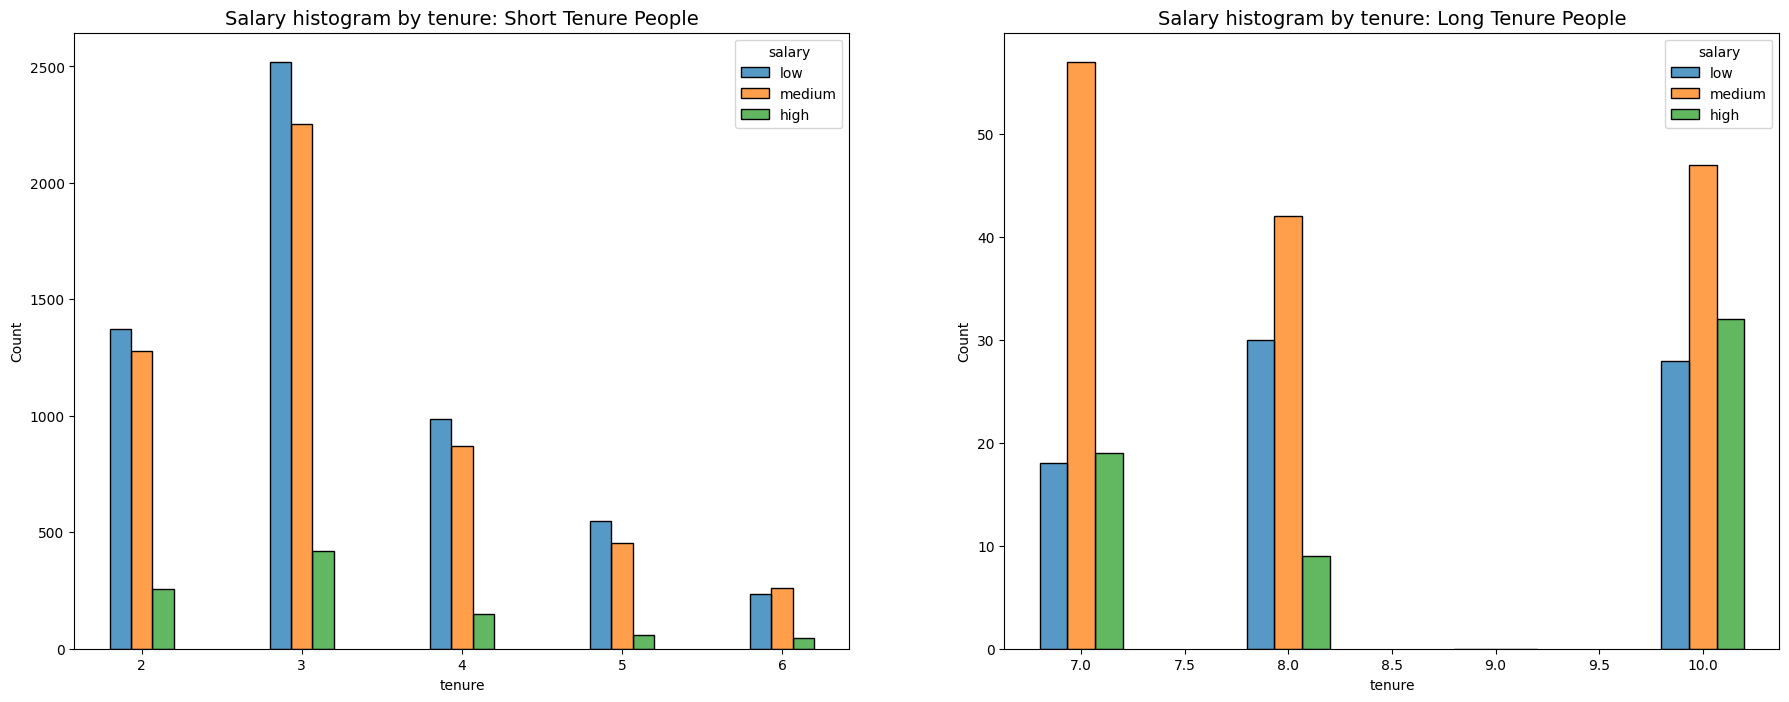

In [87]:
fig, ax = plt.subplots(1,2,figsize=(22, 8))
tenure_short = df1[df1['tenure']< 7 ]
tenure_long = df1[df1['tenure']>= 7 ]
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete = 1, hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: Short Tenure People', fontsize='14')
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete = 1, hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: Long Tenure People', fontsize='14')
plt.show()


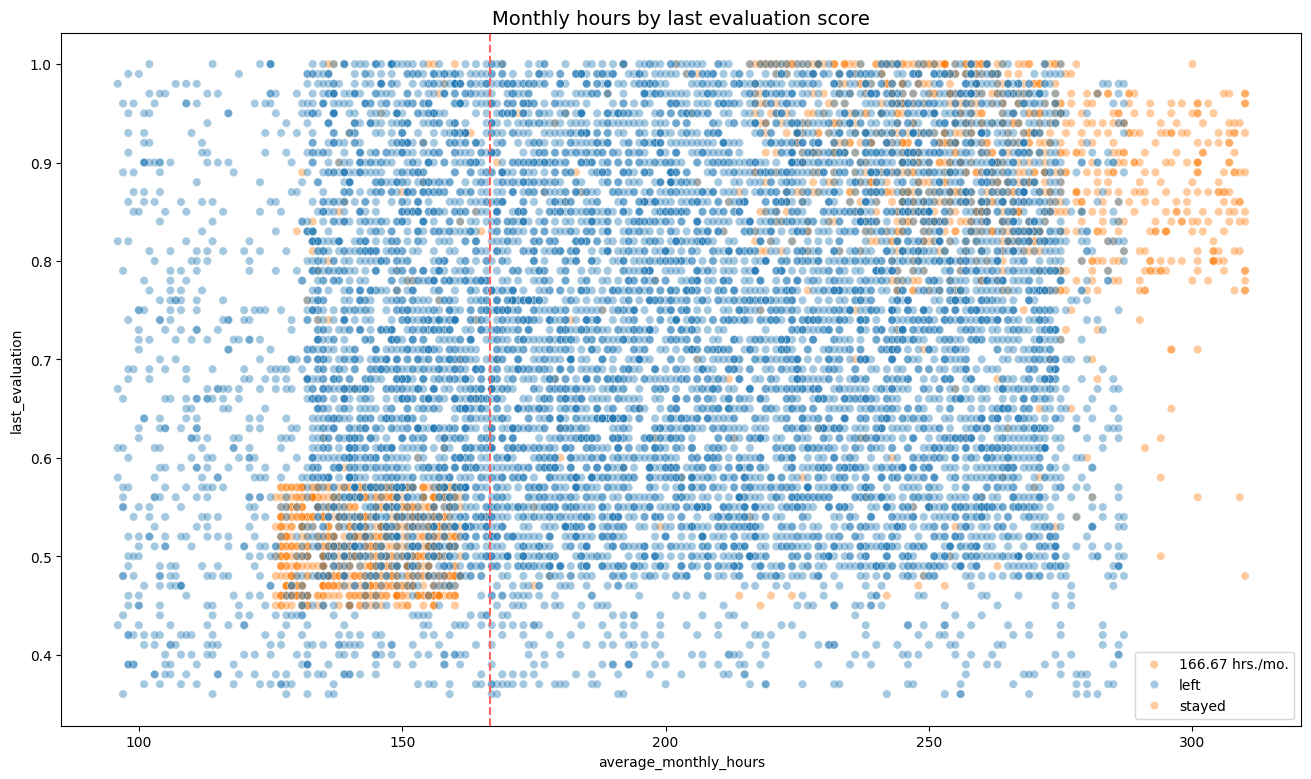

In [88]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)

# Add a vertical line for the average monthly hours
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')

# Add legend and title
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize=14)

# Show the plot
plt.show()

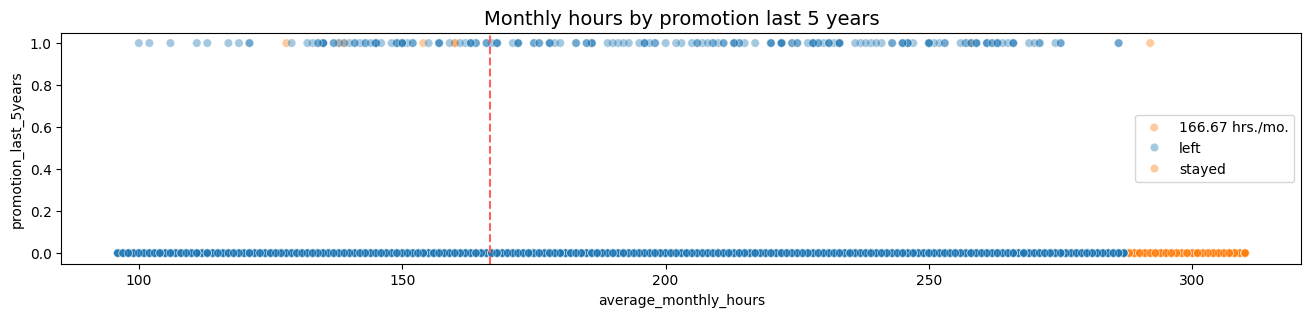

In [89]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize=14)
plt.show()

In [91]:
# Display counts for each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

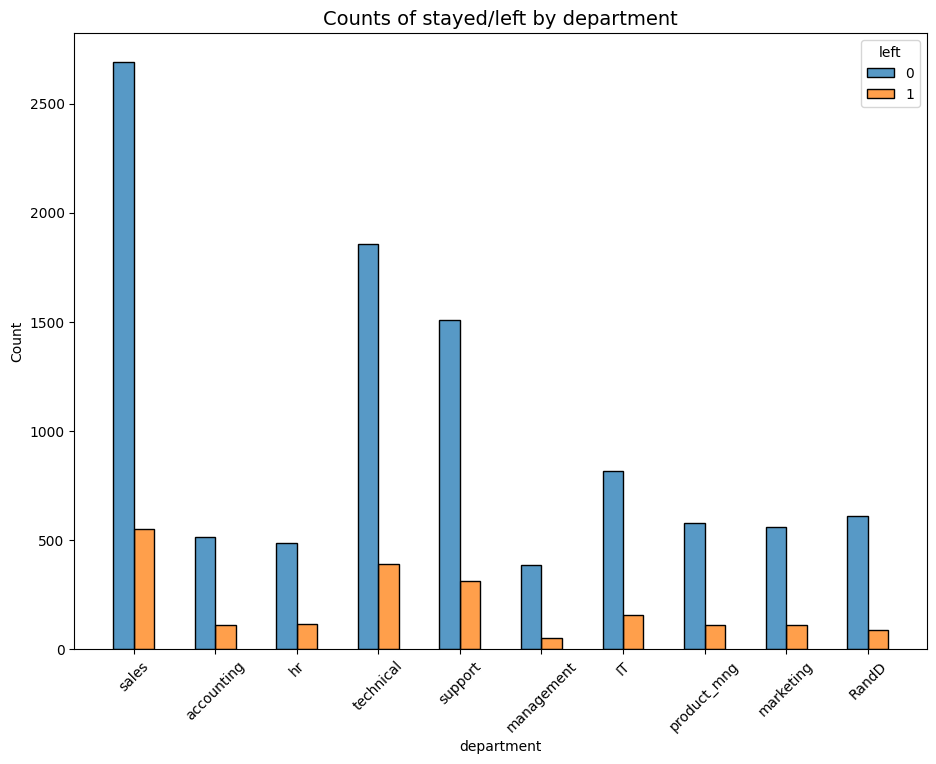

In [92]:
# Create stacked histogram to compare department distribution of employees who left vs who didn’t
plt.figure(figsize=(11, 8))
sns.histplot(
    data=df1,
    x='department',
    hue='left',
    discrete=1,
    hue_order=[0, 1],
    multiple='dodge',
    shrink=.5
)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14)
plt.show()

In [94]:
# Create a plot as needed
### YOUR CODE HERE ###

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(
    df0.corr(),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap=sns.color_palette("vlag", as_cmap=True)
)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)
plt.show()

ValueError: could not convert string to float: 'sales'

<Figure size 1600x900 with 0 Axes>